# CAMB: **C**ode for **A**nisotropies in the **M**icrowave **B**ackground

[Homepage de CAMB](https://camb.info)

- Código ampliamente utilizado en cosmología desarrollado por [Antony Lewis](https://inspirehep.net/authors/1000394) y [Anthony Challinor](https://inspirehep.net/authors/1031077)
- Resuelve las ecuaciones de Boltzmann y estima observables dado un set de parámetros cosmológicos.
- Cuenta con un [Python wrapper](https://camb.readthedocs.io/en/latest/), está escrito en [Fortran](https://camb.info/readme.html).
- [Paper](https://iopscience.iop.org/article/10.1086/309179) del código.

*Trabajo inspirado en tutorial de Alejandro Cartés*


Para instalar CAMB, en el curso basta con `pip install camb`. De todas formas, es recomendado que vayan al homepage y le echen un vistazo a las notas de CAMB.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import scienceplots

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.2


## 1. Definición de su modelo cosmológico

Una de las ideas cruciales que aprenderán en el curso, es que todo está sujeto a su modelo cosmológico.

En este caso, consideremos los parámetros de [Planck](https://arxiv.org/abs/1807.06209):

| | |
| - | - |
| $H_0 = (67.4 ± 0.5) km/s/Mpc $ | Hubble constant |
| $\Omega_m = 0.315 ± 0.0071$ | matter density parameter |
| $\Omega_c h^2: 0.120 ± 0.0011$ | dark matter density |
| $\Omega_b h^2 = 0.0224 ± 0.00011$ | baryon density |
| $n_s = 0.965 ± 0.0041$ | scalar spectral index | 
| $\tau = 0.054 ± 0.0071$ | optical depth | 

In [2]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

Debemos darle un modelo cosmológico a CAMB, para que podamos hacer predicciones. Tenemos dos formas: `camb.CAMBparams()` y `camb.set_params()`.

### 1.1 `camb.CAMBparams()`

In [3]:
help(camb.CAMBparams)

Help on class CAMBparams in module camb.model:

class CAMBparams(camb.baseconfig.F2003Class)
 |  CAMBparams(**kwargs)
 |  
 |  Object storing the parameters for a CAMB calculation, including cosmological parameters and
 |  settings for what to calculate. When a new object is instantiated, default parameters are set automatically.
 |  
 |  To add a new parameter, add it to the CAMBparams type in model.f90, then  edit the _fields_ list in the CAMBparams
 |  class in model.py to add the new parameter in the corresponding location of the member list. After rebuilding the
 |  python version you can then access the parameter by using params.new_parameter_name where params is a CAMBparams
 |  instance. You could also modify the wrapper functions to set the field value less directly.
 |  
 |  You can view the set of underlying parameters used by the Fortran code by printing the CAMBparams instance.
 |  In python, to set cosmology parameters it is usually best to use :meth:`set_cosmology` and
 

In [4]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [5]:
# Podemos cambiar algún parámetro después de fijar el modelo.

pars.set_dark_energy(w=-1);

pars

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [6]:
# Ahora, para obtener resultados podemos simplemente

results = camb.get_results(pars)

### 1.2 `camb.set_params()`

In [7]:
pars2 = camb.set_params(H0=67.4, w=-0.1, cs2=0.1)
results2 = camb.get_results(pars2)

## 2 Distances

In [8]:
help(results.luminosity_distance)

Help on method luminosity_distance in module camb.results:

luminosity_distance(z) method of camb.results.CAMBdata instance
    Get luminosity distance from to redshift z.
    
    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer functions or
    power spectra.
    
    :param z: redshift or array of redshifts
    :return: luminosity distance (matches rank of z)



In [9]:
help(results.angular_diameter_distance)

Help on method angular_diameter_distance in module camb.results:

angular_diameter_distance(z) method of camb.results.CAMBdata instance
    Get (non-comoving) angular diameter distance to redshift z.
    
    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer
    functions or power spectra.
    
    :param z: redshift or array of redshifts
    :return: angular diameter distances, matching rank of z



In [10]:
zs = np.linspace(0, 10, 1_000)

D_ang = results.angular_diameter_distance(zs)
D_lum = results.luminosity_distance(zs)

Text(0, 0.5, '$d$ [Mpc]')

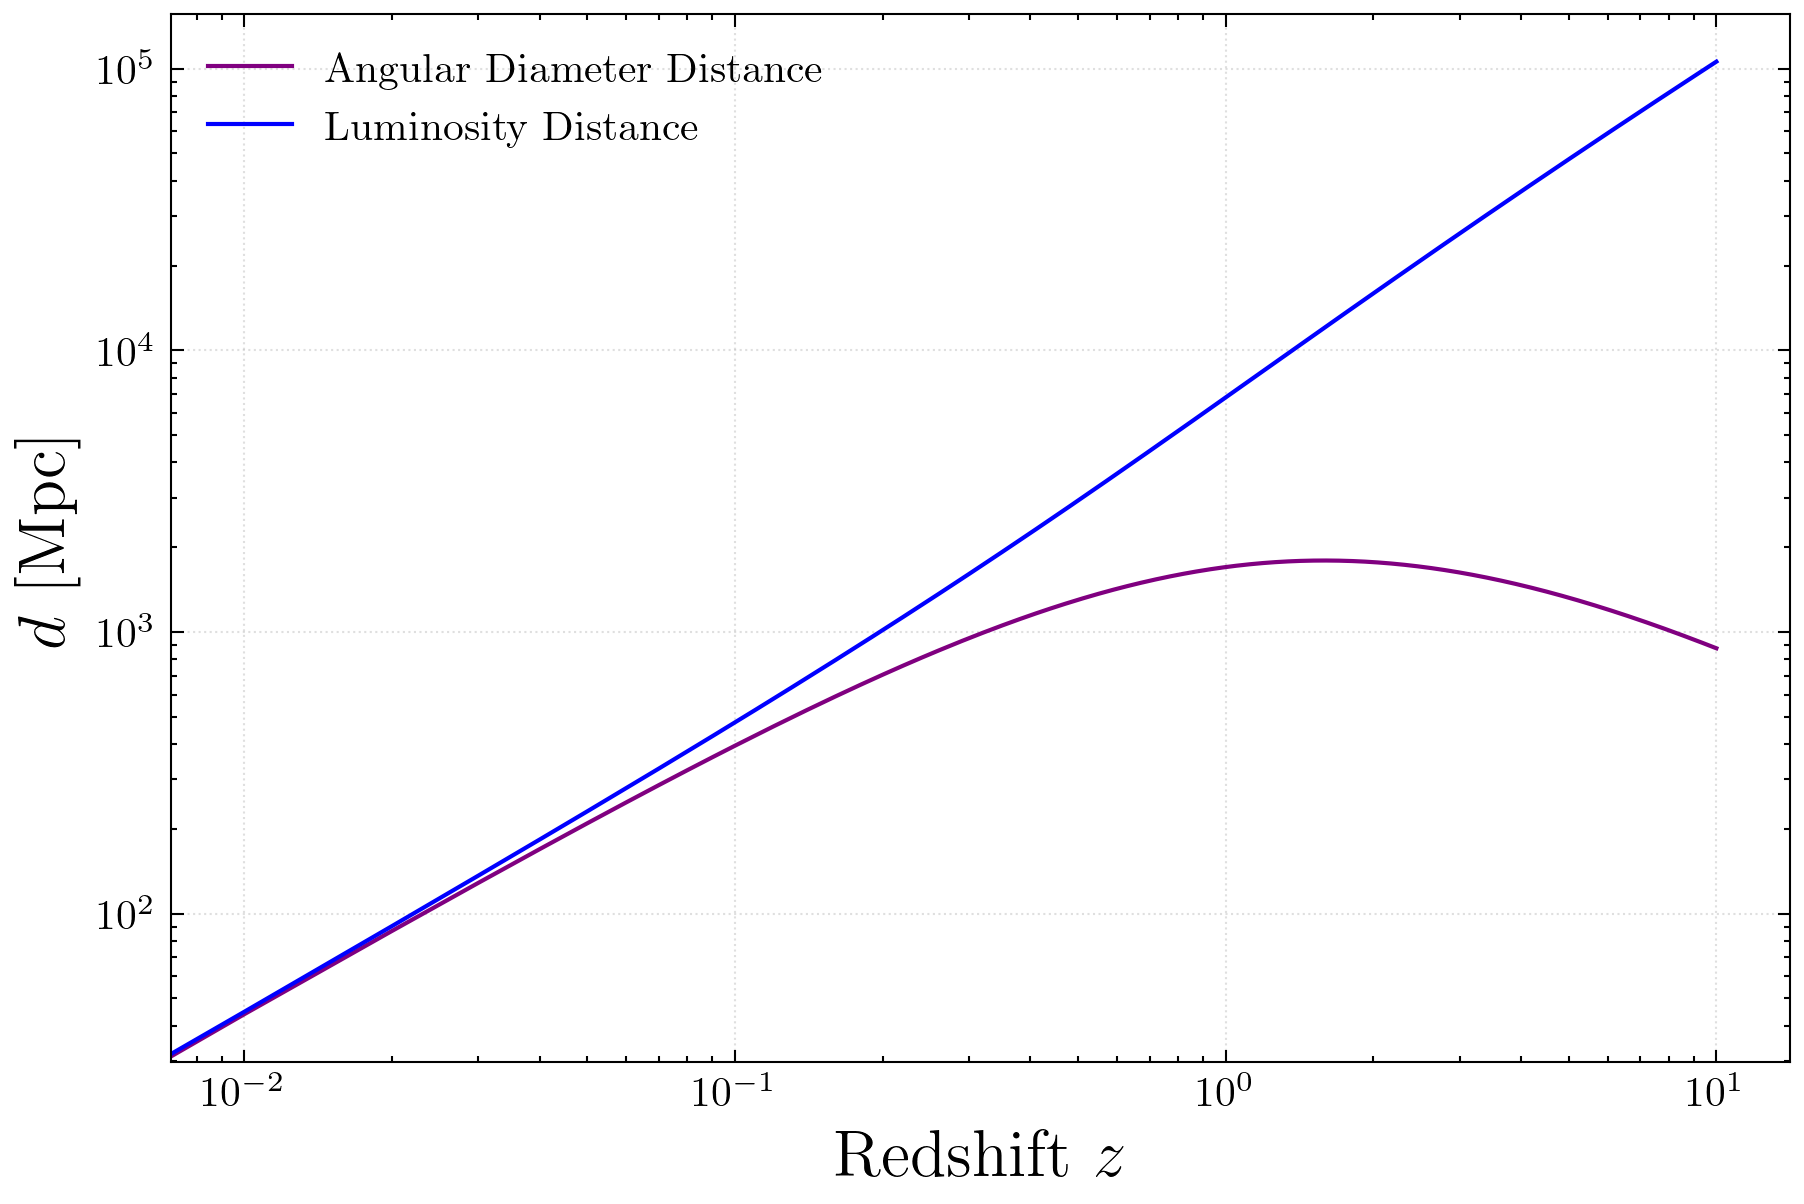

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True)

ax.loglog(zs, D_ang, color='purple', label='Angular Diameter Distance')
ax.loglog(zs, D_lum, color='b', label='Luminosity Distance')

ax.grid(alpha=0.4, ls=':')

ax.legend()
ax.set_xlabel(r'Redshift $z$', fontsize=16)
ax.set_ylabel(r'$d$ [Mpc]', fontsize=16)

#### **Hágalo usted mismx:**


Comparar lo obtenido con CAMB, con la solución analítica. Para la solución analítica, es recomendable definir las funciones dependiendo de los parámetros cosmológicos ($\Omega_a$, donde $a$ es dark matter, bariones, dark energy, etc), para que puedan ver cómo cambian sus resultados al ir variando estos parámetros.

Cabe destacar que estos $\Omega$ se llaman **Parámetros de densidad**, que son adimensionales y su definición es $$\Omega_a(z) \equiv \frac{\rho_a}{\rho_{\text{cr},0}},$$ donde $$\rho_{\text{cr},0}=\frac{3 H_0^2}{8\pi G}$$ es la densidad crítica en el presente. Si la suma de todas las componentes de materia/energía del universo son iguales a la densidad crítica, el universo es Euclideo.

*(Recuerden que el subíndice $,0$ hace referencia a evaluar en el tiempo presente, no confundir con la notación de derivadas de GR)*

---
La forma analítica de las distancias es

$$ D_a(z) = \frac{f_K(\chi)}{1+z}, \quad D_L(z) = (1+z)f_K(\chi)$$ 

Donde:
\begin{align*}
    f_K(\chi) =
    \begin{dcases}
        \frac{c}{H_0\sqrt{\Omega_{K,0}}} \sinh{\left(\sqrt{\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}>0 \\
        \frac{c}{H_0}\int_0^z \frac{dx}{E(x)} & \Omega_{k,0}=0\\
        \frac{c}{H_0\sqrt{-\Omega_{K,0}}} \sin{\left(\sqrt{-\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}<0\\
    \end{dcases}
\end{align*}


\begin{align*}
    E(z) = H(z) / H_0
\end{align*}


\begin{align*}
    H^2(z) = H_0^2 \left[\Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}(1+z)^{3(1+w)} + \Omega_{K,0}(1+z)^2\right]
\end{align*}

## 3 Power Spectra

In [12]:
help(results.get_linear_matter_power_spectrum)

Help on method get_linear_matter_power_spectrum in module camb.results:

get_linear_matter_power_spectrum(var1=None, var2=None, hubble_units=True, k_hunit=True, have_power_spectra=True, params=None, nonlinear=False) method of camb.results.CAMBdata instance
    Calculates :math:`P_{xy}(k)`, where x, y are one of model.Transfer_cdm, model.Transfer_xx etc.
    The output k values are not regularly spaced, and not interpolated. They are either k or k/h depending on the
    value of k_hunit (default True gives k/h).
    
    For a description of outputs for different var1, var2 see :ref:`transfer-variables`.
    
    :param var1: variable i (index, or name of variable; default delta_tot)
    :param var2: variable j (index, or name of variable; default delta_tot)
    :param hubble_units: if true, output power spectrum in (Mpc/h) units, otherwise Mpc
    :param k_hunit: if true, matter power is a function of k/h, if false, just k (both :math:`{\rm Mpc}^{-1}` units)
    :param have_power_spect

In [13]:
help(results.get_matter_power_spectrum)

Help on method get_matter_power_spectrum in module camb.results:

get_matter_power_spectrum(minkh=0.0001, maxkh=1.0, npoints=100, var1=None, var2=None, have_power_spectra=False, params=None) method of camb.results.CAMBdata instance
    Calculates :math:`P_{xy}(k/h)`, where x, y are one of Transfer_cdm, Transfer_xx etc.
    The output k values are regularly log spaced and interpolated. If NonLinear is set, the result is non-linear.
    
    For a description of outputs for different var1, var2 see :ref:`transfer-variables`.
    
    :param minkh: minimum value of k/h for output grid (very low values < 1e-4 may not be calculated)
    :param maxkh: maximum value of k/h (check consistent with input params.Transfer.kmax)
    :param npoints: number of points equally spaced in log k
    :param var1: variable i (index, or name of variable; default delta_tot)
    :param var2: variable j (index, or name of variable; default delta_tot)
    :param have_power_spectra: set to True if already compute

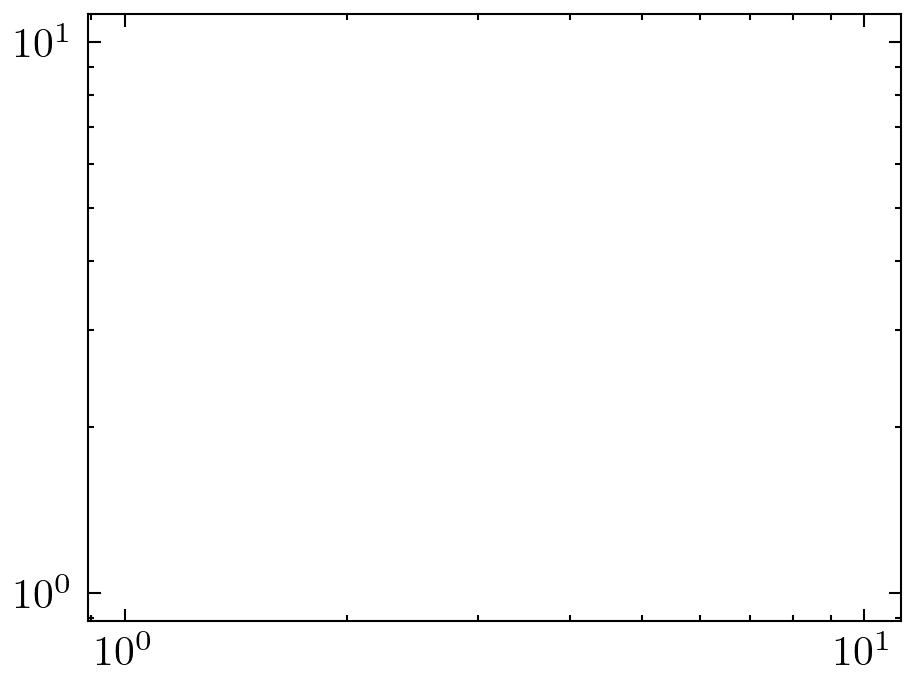

In [14]:
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True, 
                                                     k_hunit=True)

plt.figure()
plt.loglog(kh, PK[0, :])

Falta fijar (set) nuestro matter power spectrum. Debemos darle info a CAMB sobre los redshifts y número de onda. Ahora, obtendremos $P(k,z)$.

In [15]:
z_max = 250
z_min = 0
redshifts = np.arange(z_min, z_max, z_max//5)

# set Matter Power Spectrum, para los redshifts que tenemos y un kmax (escala minima)
pars.set_matter_power(redshifts=redshifts, kmax=1)

# Calculamos el matter power spectrum
results = camb.get_results(pars)

# obtenemos el Matter Power Spectrum, kh son los numeros de onda, z reshifts y 
# PK el valor del power spectrum para ese par de kh y z.
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True,
                                                     k_hunit=True)

Note: redshifts have been re-sorted (earliest first)


Graficamos el espectro de potencia que obtuvo CAMB

Text(0.5, 0.98, 'Matter Power Spectrum')

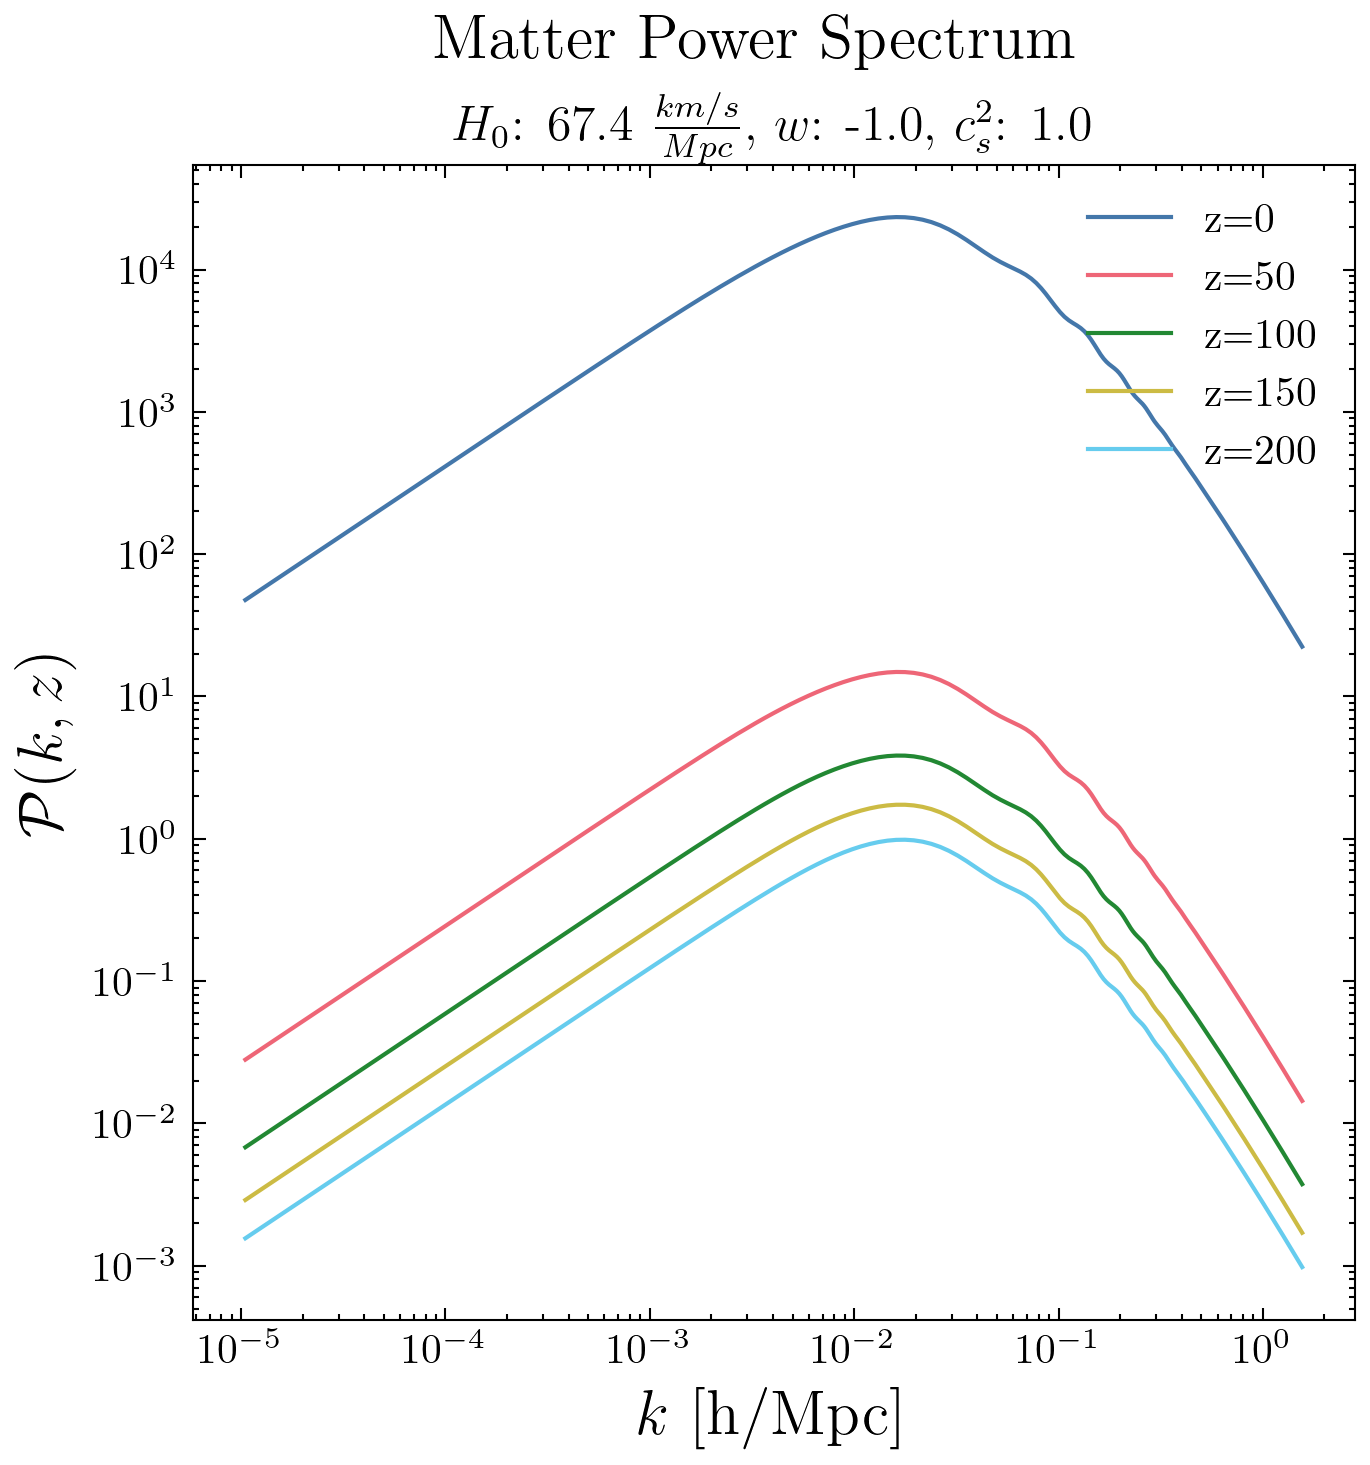

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh, PK[iz, :], label=f"z={redshift}")


plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax.set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax.set_title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f" $w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")

fig.suptitle("Matter Power Spectrum", fontsize=15)

Es muy relevante el peak del power spectrum! También es importante entender por qué para las escalas más pequeñas decae.
Les propongo que jueguen con distintos sets de parámetros, es una muy buena forma de aprender y ver qué afecta al matter power spectrum.

### Términos no lineales en el MPS

De una manera similar a la anterior, pero cuando estamos considerando términos no lineales es súper complicado llegar a construir el matter power spectrum.
Usualmente se calcula el contraste de materia oscura $\delta_c$, ya que sólo interactúa gravitacionalmente. Pero en la realidad no observamos la materia oscura, sino que galaxias. Necesitamos 
$$\delta_c \rightarrow \delta_g$$
Para ello, se asumen modelos con ciertos parámetros de sesgo, es decir
$$\delta_g = b \delta_c + b_2 \delta_c^2 + \dots + \epsilon + b_\mathcal{G}\delta_c+\dots $$

donde $b$ sería el *bias parameter* lineal, $b_2$ el cuadrático, $\epsilon$ un ruido, $b_\mathcal{G}$ algo extraño etc. Pero para encontrarlos no hay teoría, sólo se pueden usar observaciones/simulaciones.
Una de las cosas que hace CAMB es usar un fit (observaciones), llamado HALOfit.

In [17]:
redshifts = [10, 5, 1, 0]

# set non-linear Matter Power Spectrum
pars.NonLinear = camb.model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh_nl, z_nl, PK_nl = results.get_matter_power_spectrum(minkh=1e-4)


# o de forma alternativa, de la celda anterior
# kh_nl, z_nl, PK_nl = results.get_linear_matter_power_spectrum(hubble_units=True,
#                                                               k_hunit=True
#                                                               nonlinear=True)


# set linear Matter Power Spectrum
pars.NonLinear = camb.model.NonLinear_none
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh, z, PK = results.get_matter_power_spectrum(minkh=1e-4)

Grafiquemos tanto el lineal como no lineal, para ver cómo difieren.

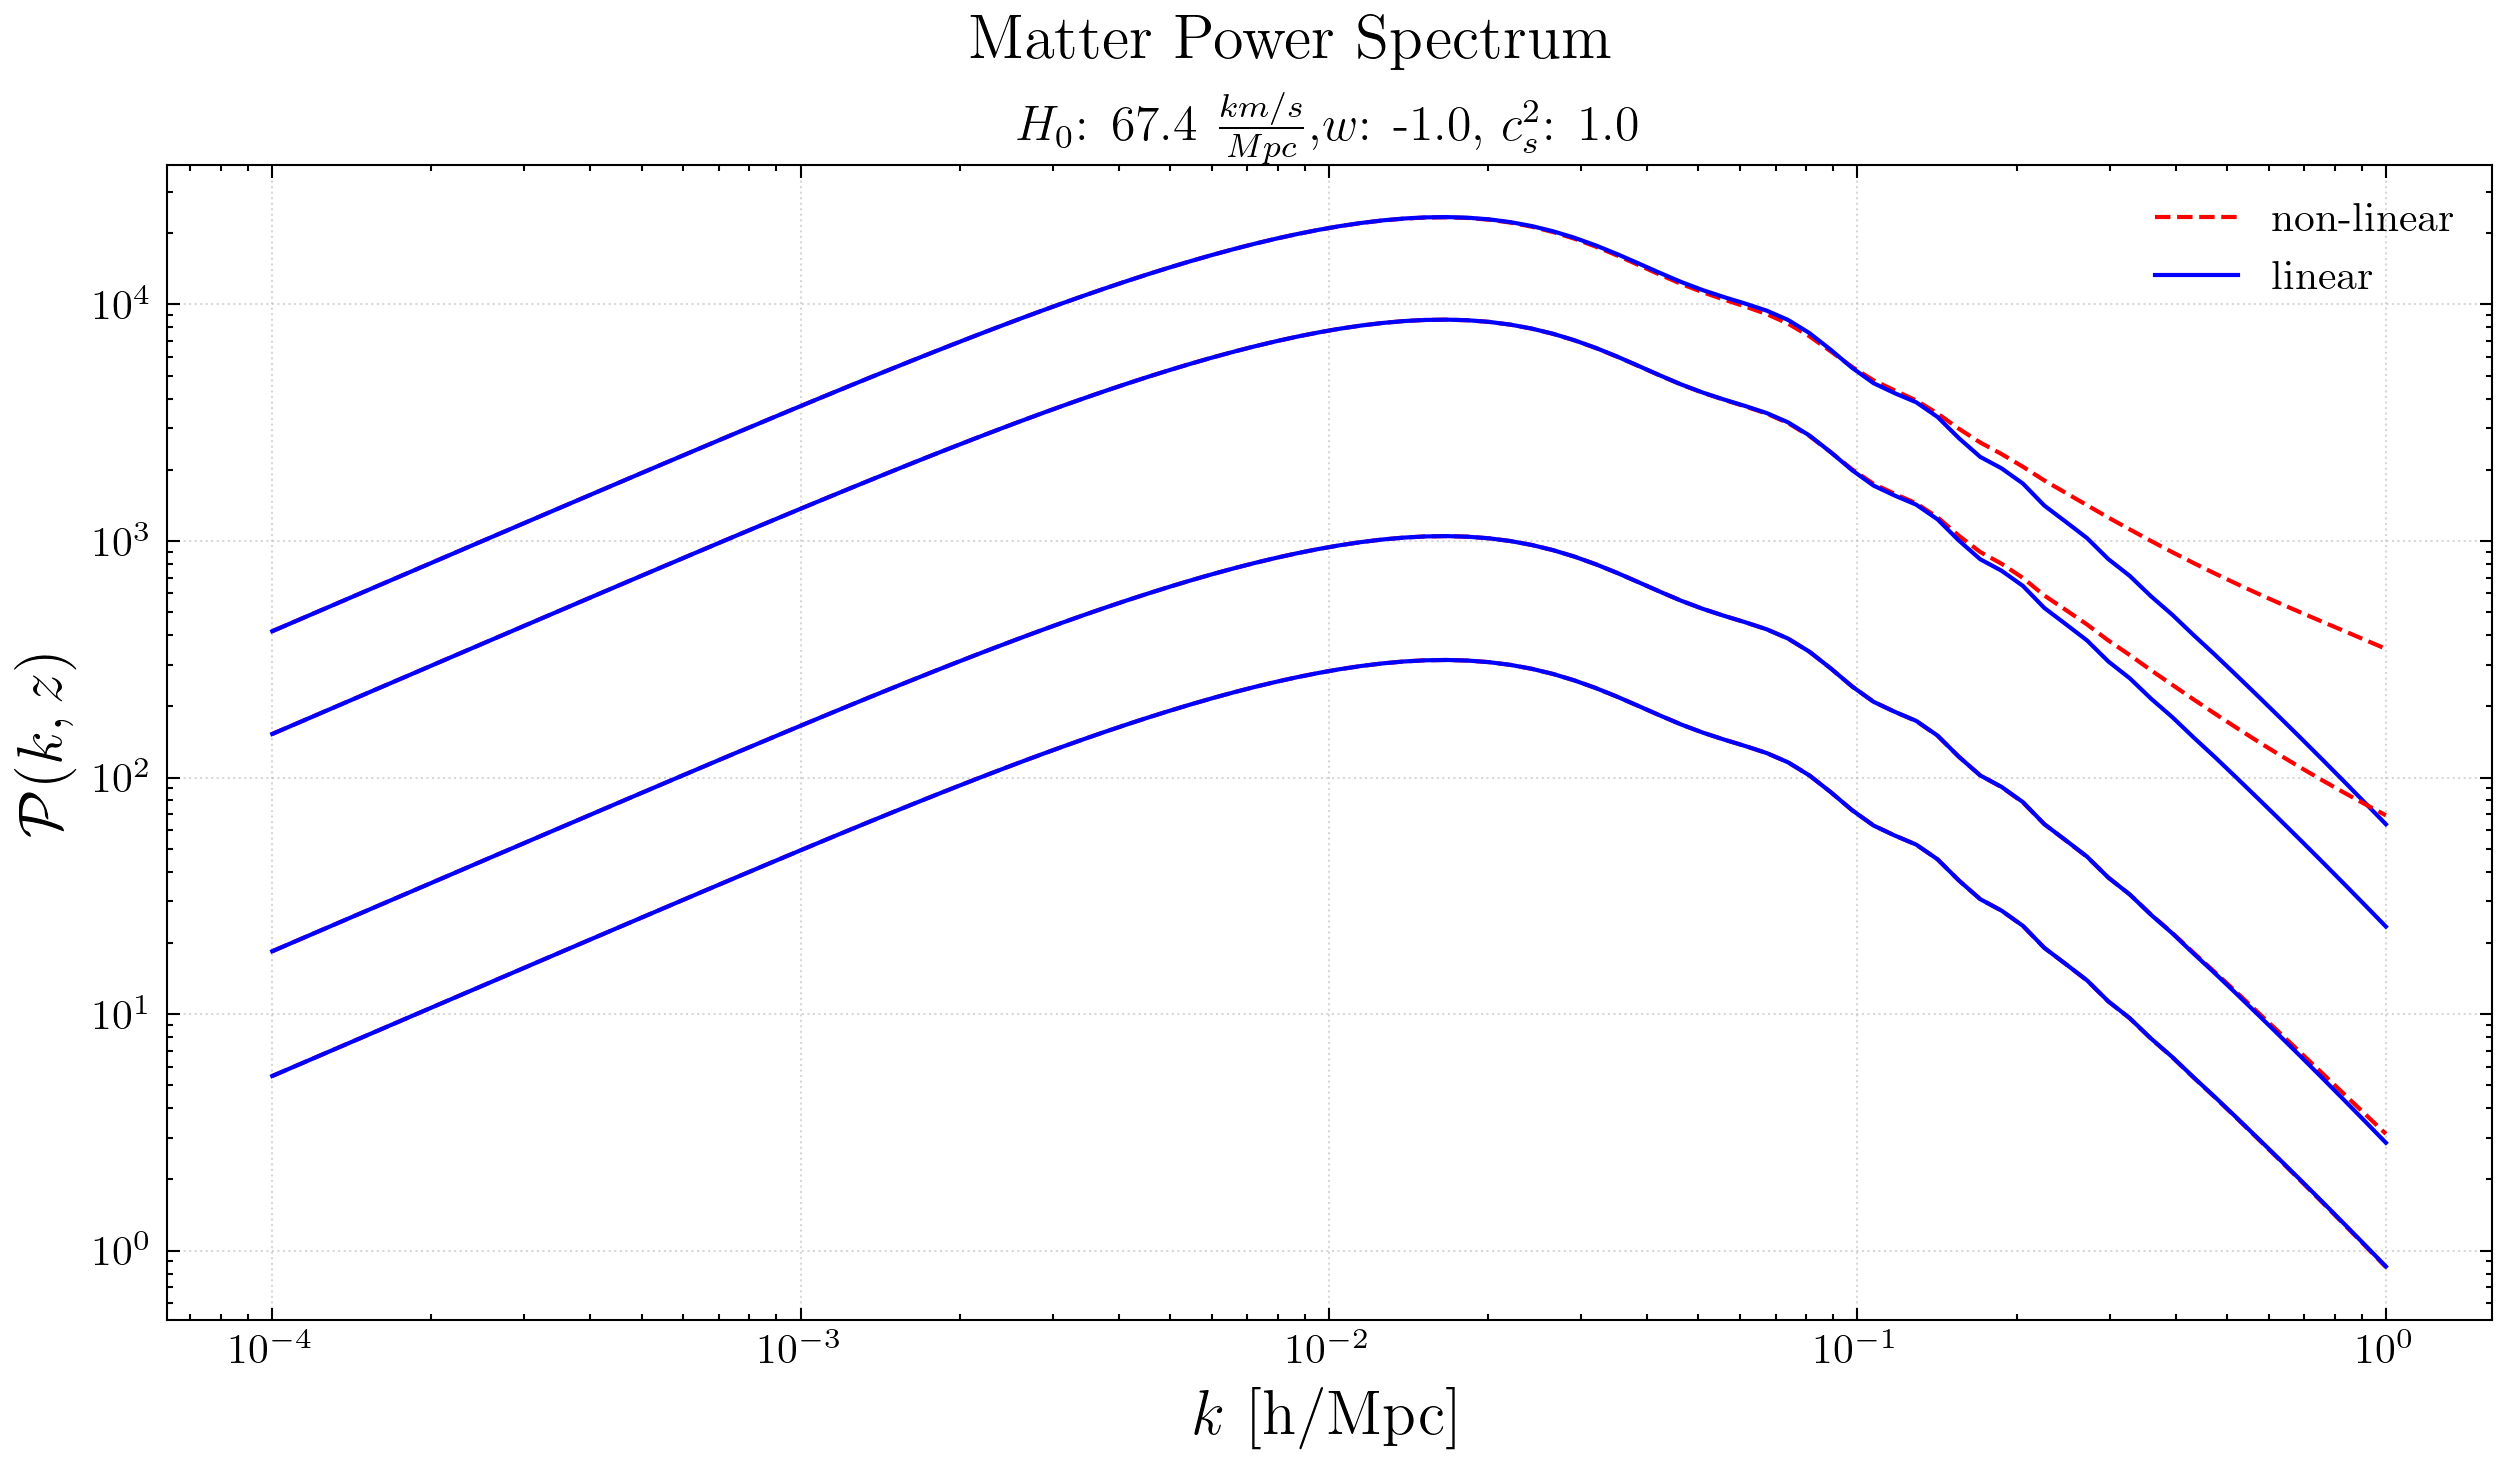

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh_nl, PK_nl[iz, :], color='r', ls='--')
    ax.loglog(kh, PK[iz, :], color='b')


ax.legend(['non-linear', 'linear'], loc='upper right')
ax.set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax.set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax.set_title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f"$w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")
ax.grid(alpha=0.5, ls=':')
fig.suptitle("Matter Power Spectrum", fontsize=15)

plt.show()

Justamente, era esperable que los efectos no lineales se vean en escalas pequeñas (gravedad le gana a la expansión del universo).

### Matter PS utilizando función de Transferencia

$$ \mathcal{P}(k) \propto T(k)^2 P_{\zeta}(k)$$

<image src="https://i.ibb.co/JsDTkLT/image.png" width=500px>

<image src="https://i.ibb.co/rwdKrpY/image.png" width=500px>

In [19]:
pars.set_matter_power(redshifts=[0], kmax=1)
results = camb.get_results(pars)

transf = results.get_matter_transfer_data()

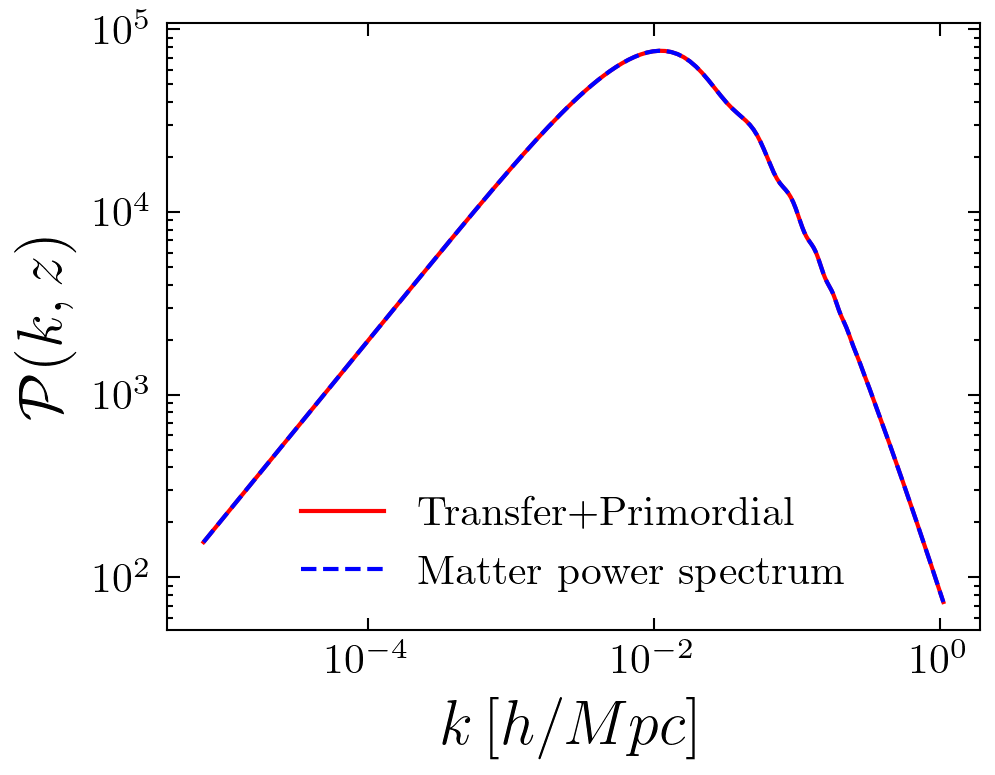

In [20]:
# Get transfer function
kh = transf.transfer_data[0, :, 0]
k = kh * results.Params.h  # transfer data gives the results in units of h/MPC, so we transform

transfer = transf.transfer_data[camb.model.Transfer_tot-1,:,0]

# Get primordial power spectrum
primordial_PK = results.Params.scalar_power(k)

# All together
matter_power = primordial_PK * transfer**2 * k**4 / (k**3/(2*np.pi**2))

kh2, zs, PK = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)

plt.loglog(k, matter_power, c='r', label='Transfer+Primordial')
plt.loglog(kh2, PK[0, :], c='b', ls='--', label='Matter power spectrum')
plt.legend()
plt.ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
plt.xlabel(r'$k\, [h/Mpc]$', fontsize=15)

plt.show()

## Angular Power Spectrum

Un poco más de lo mismo, ahora veremos cómo encontrar el angular power spectrum. Si alguien se motiva, sería bueno que en un mismo gráfico pongan los datos de Planck y lo predicho por el CMB.

In [21]:
help(results.get_cmb_power_spectra)

Help on method get_cmb_power_spectra in module camb.results:

get_cmb_power_spectra(params=None, lmax=None, spectra=('total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'), CMB_unit=None, raw_cl=False) method of camb.results.CAMBdata instance
    Get CMB power spectra, as requested by the 'spectra' argument. All power spectra are
    :math:`\ell(\ell+1)C_\ell/2\pi` self-owned numpy arrays (0..lmax, 0..3), where 0..3 index
    are TT, EE, BB, TE, unless raw_cl is True in which case return just :math:`C_\ell`.
    For the lens_potential the power spectrum returned is that of the deflection.
    
    Note that even if lmax is None, all spectra a returned to the same lmax, appropriate
    for lensed spectra. Use the individual functions instead if you want to the full unlensed
    and lensing potential power spectra to the higher lmax actually computed.
    
    :param params: optional :class:`~.model.CAMBparams` instance with parameters to use. If None,

In [22]:
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


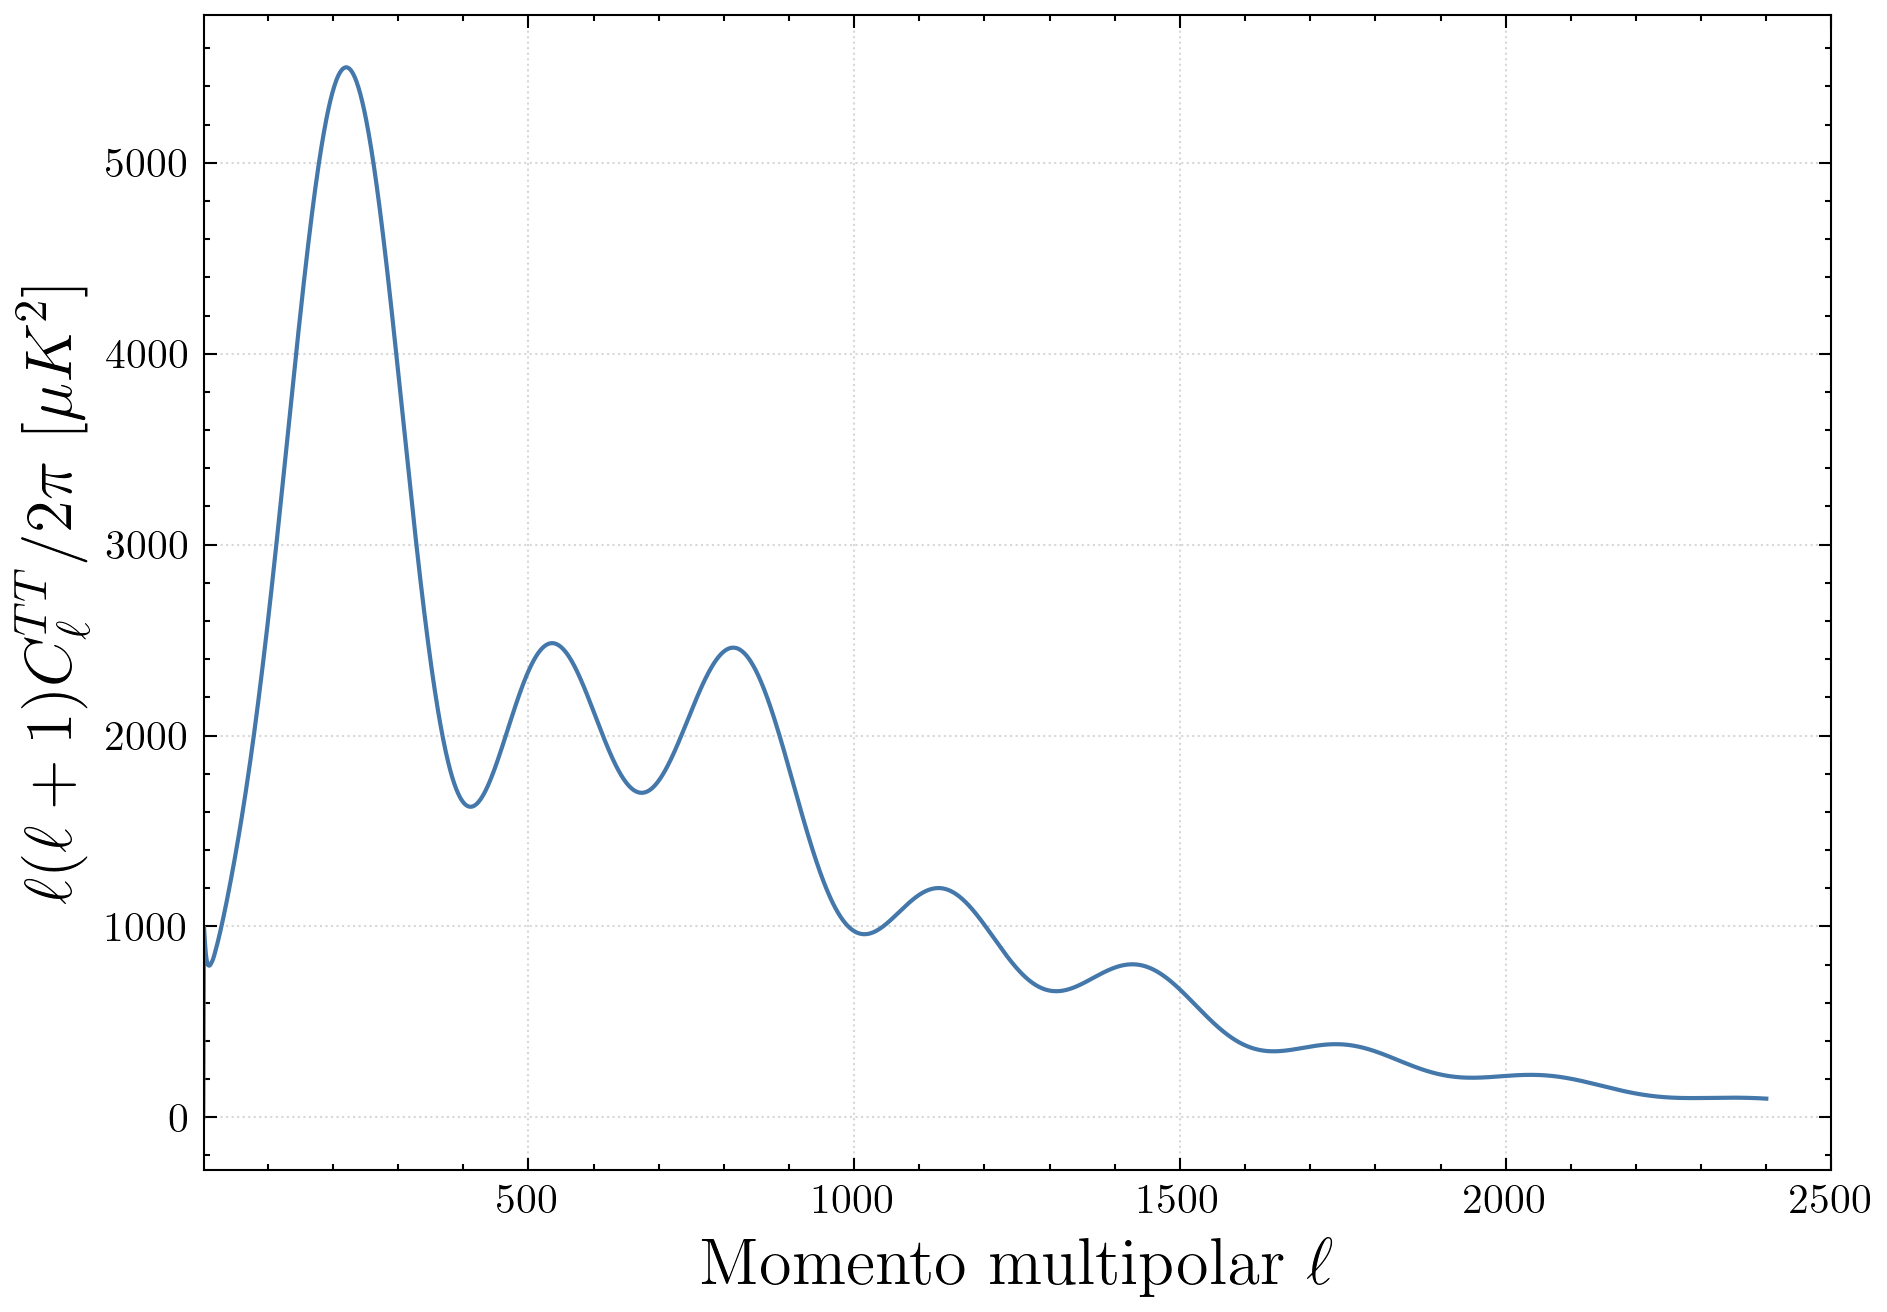

In [23]:
unlensedCL=powers['unlensed_scalar']

ells = np.arange(unlensedCL[:, 0].shape[0])

plt.figure(figsize=(7, 5))
plt.plot(ells, unlensedCL[:, 0])  # 0: TT, 1: EE, 2: BB, 3: TE
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()